In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

# Check Missing Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Visualization

In [5]:
col_list = df.columns
ind = 0
for i in range(7):
    for j in range(2):
        print("sns.distplot(df['{}'], ax = ax[{},{}])".format(col_list[ind], i, j))
        ind += 1

sns.distplot(df['age'], ax = ax[0,0])
sns.distplot(df['sex'], ax = ax[0,1])
sns.distplot(df['cp'], ax = ax[1,0])
sns.distplot(df['trestbps'], ax = ax[1,1])
sns.distplot(df['chol'], ax = ax[2,0])
sns.distplot(df['fbs'], ax = ax[2,1])
sns.distplot(df['restecg'], ax = ax[3,0])
sns.distplot(df['thalach'], ax = ax[3,1])
sns.distplot(df['exang'], ax = ax[4,0])
sns.distplot(df['oldpeak'], ax = ax[4,1])
sns.distplot(df['slope'], ax = ax[5,0])
sns.distplot(df['ca'], ax = ax[5,1])
sns.distplot(df['thal'], ax = ax[6,0])
sns.distplot(df['target'], ax = ax[6,1])


/tmp/ipykernel_19/1611838994.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], ax = ax[0,0])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_19/1611838994.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

<Axes: xlabel='target', ylabel='Density'>

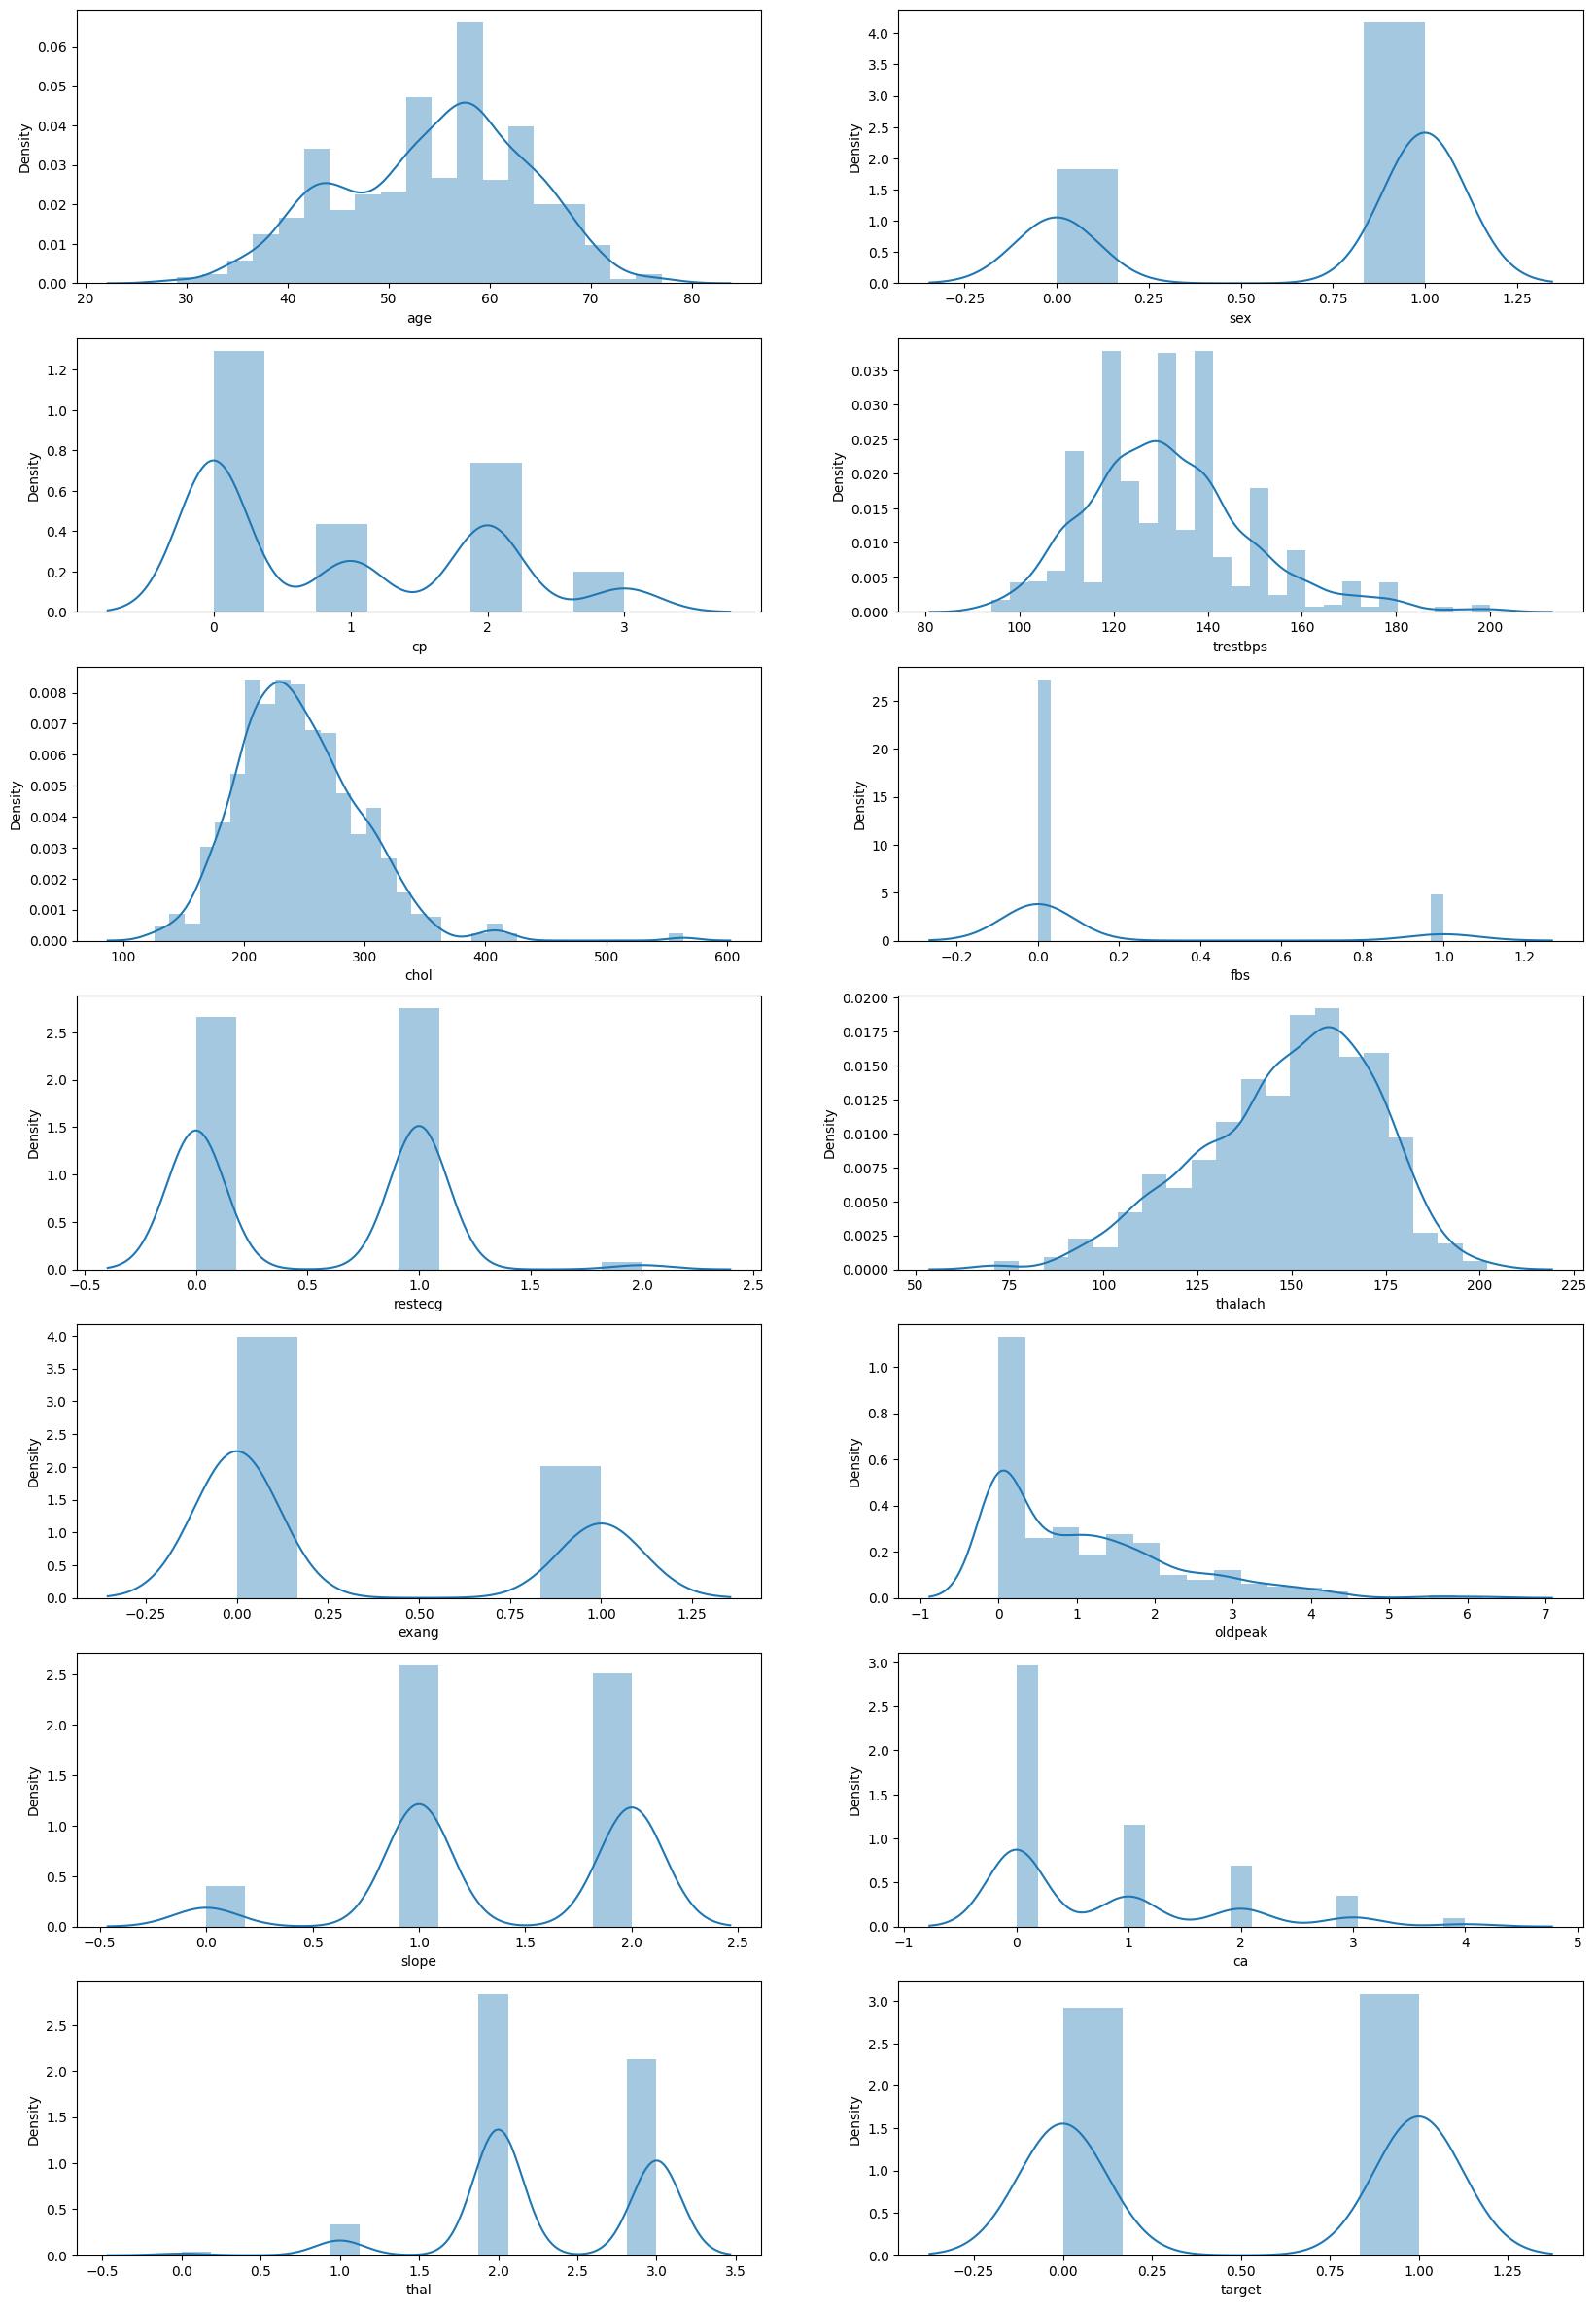

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(7,2, figsize=(20,30))
sns.distplot(df['age'], ax = ax[0,0])
sns.distplot(df['sex'], ax = ax[0,1])
sns.distplot(df['cp'], ax = ax[1,0])
sns.distplot(df['trestbps'], ax = ax[1,1])
sns.distplot(df['chol'], ax = ax[2,0])
sns.distplot(df['fbs'], ax = ax[2,1])
sns.distplot(df['restecg'], ax = ax[3,0])
sns.distplot(df['thalach'], ax = ax[3,1])
sns.distplot(df['exang'], ax = ax[4,0])
sns.distplot(df['oldpeak'], ax = ax[4,1])
sns.distplot(df['slope'], ax = ax[5,0])
sns.distplot(df['ca'], ax = ax[5,1])
sns.distplot(df['thal'], ax = ax[6,0])
sns.distplot(df['target'], ax = ax[6,1])

In [7]:
corrmat = df.corr()
fig = plt.figure(figsize=(16,16))
sns.heatmap(corrmat, annot=True)
plt.show()

In [8]:
sns.countplot(x='sex', data=df, palette='coolwarm')

<Axes: xlabel='sex', ylabel='count'>

In [9]:
sns.countplot(x='age', data=df, palette='coolwarm')
plt.xticks(rotation = 80)
plt.show()

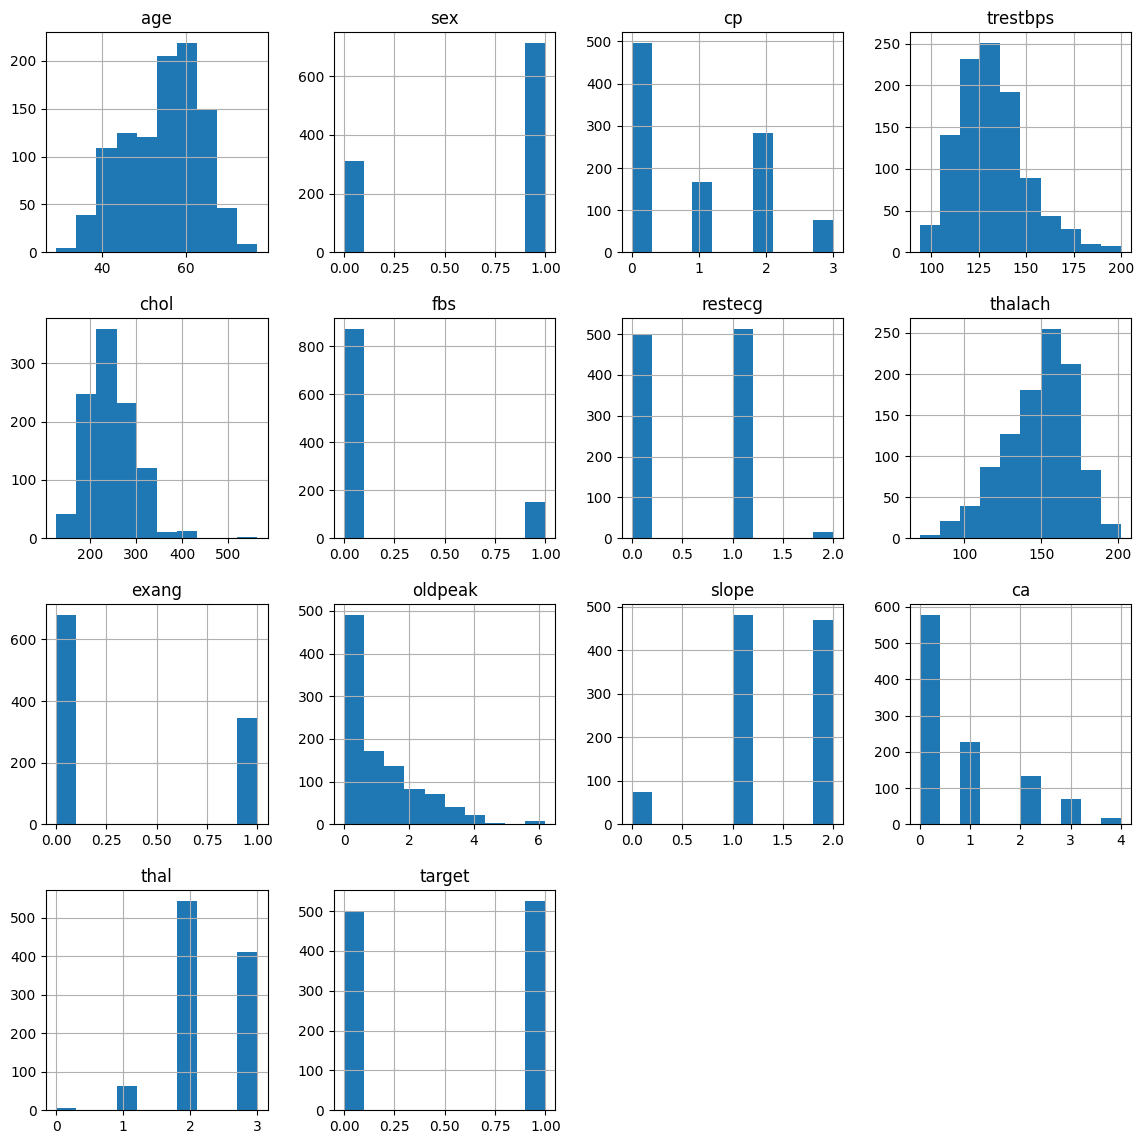

In [10]:
df.hist(figsize=(14,14))
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

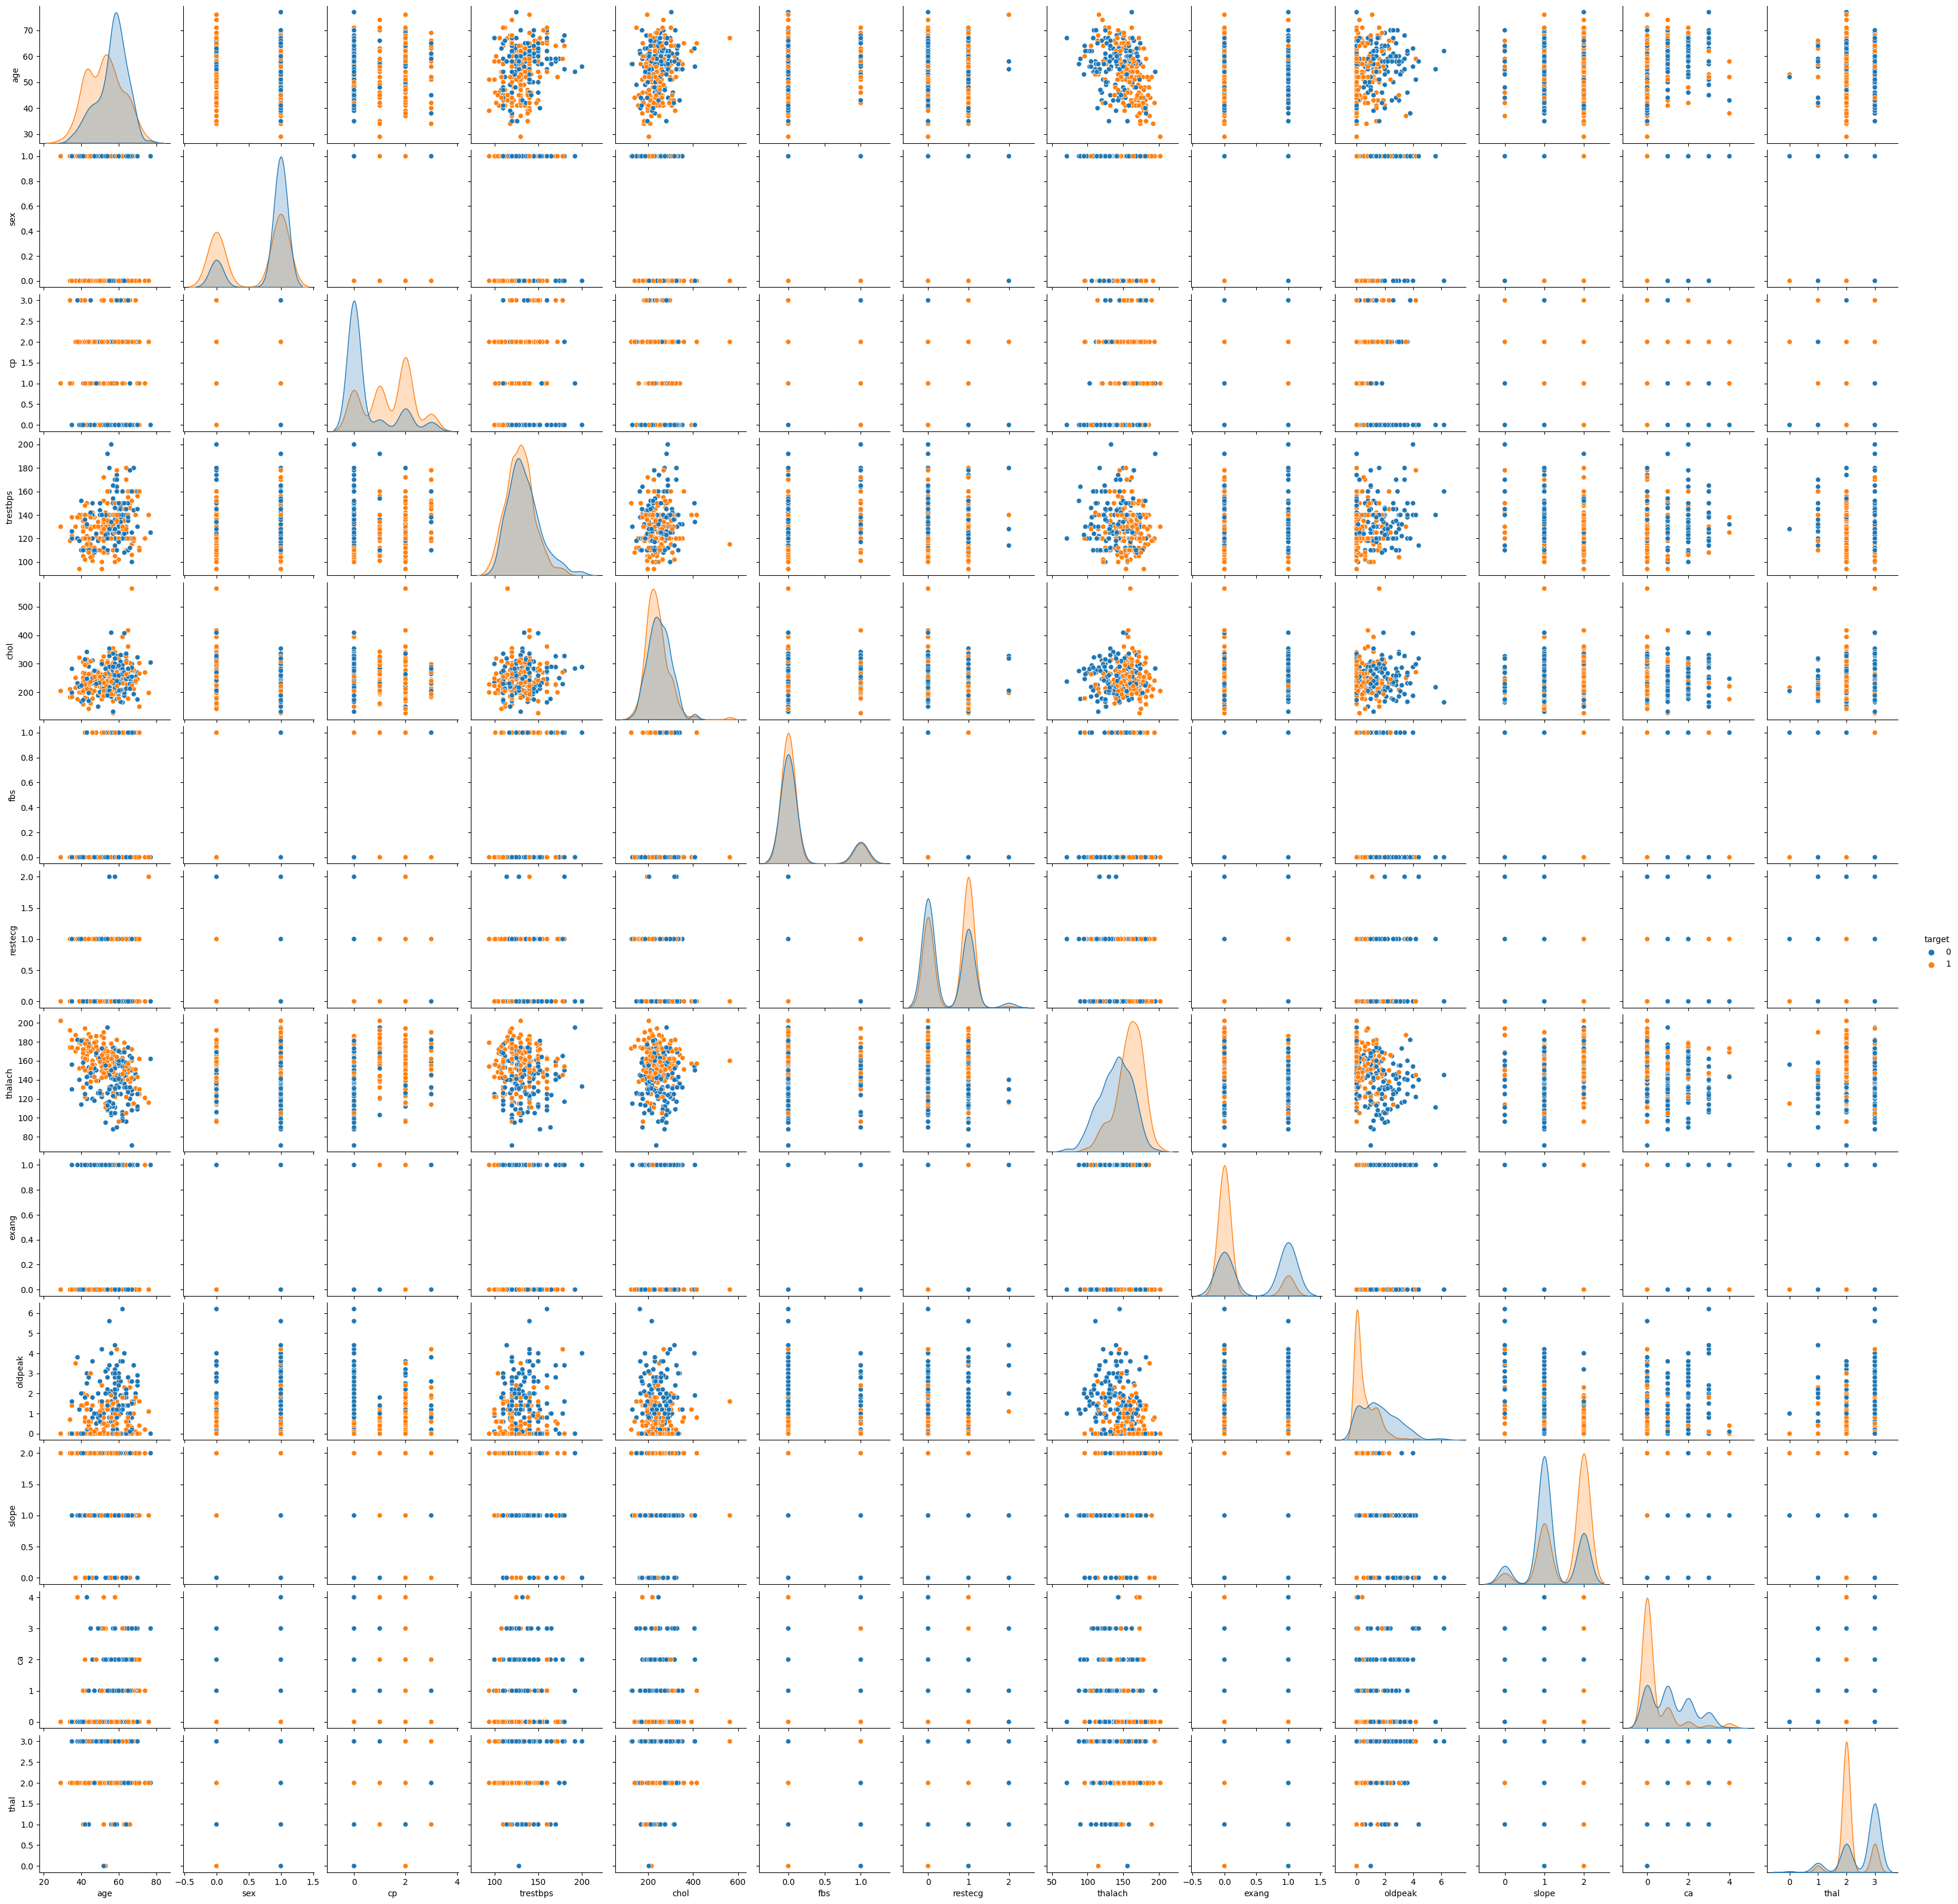

In [11]:
sns.pairplot(df, hue='target')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='age'>

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


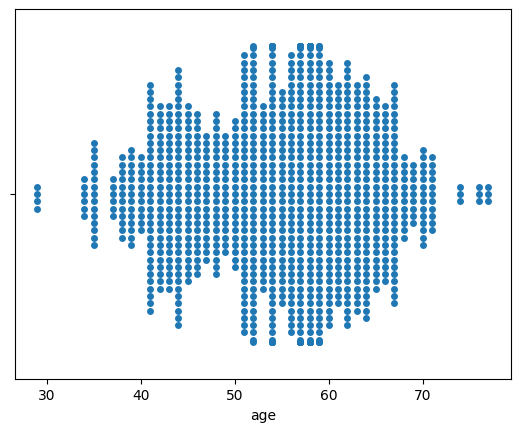

In [12]:
sns.swarmplot(x = df['age'])

In [13]:
pd.crosstab(df.age, df.target).plot(kind = 'bar')

<Axes: xlabel='age'>

<Axes: xlabel='ca'>

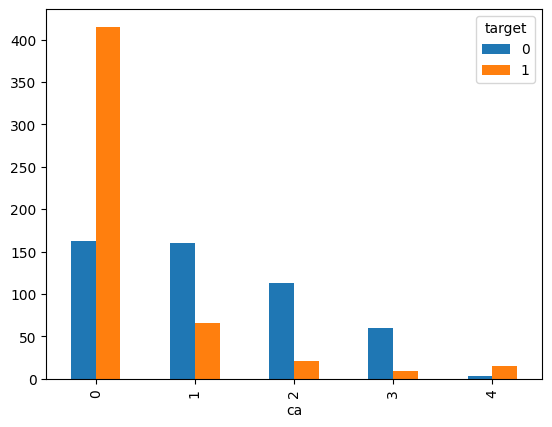

In [14]:
pd.crosstab(df.ca, df.target).plot(kind = 'bar')

<Axes: xlabel='age', ylabel='trestbps'>

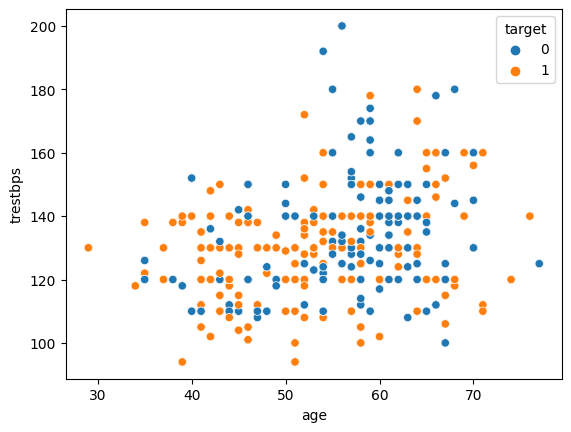

In [15]:
sns.scatterplot(x='age', y='trestbps', hue='target', data=df)

<Axes: xlabel='age', ylabel='trestbps'>

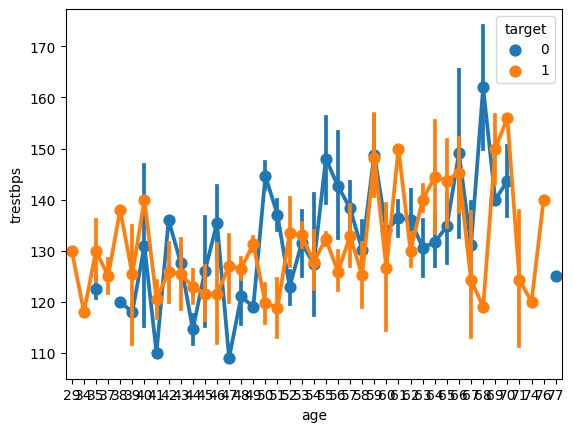

In [16]:
sns.pointplot(x='age', y='trestbps', hue='target', data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='age', ylabel='trestbps'>

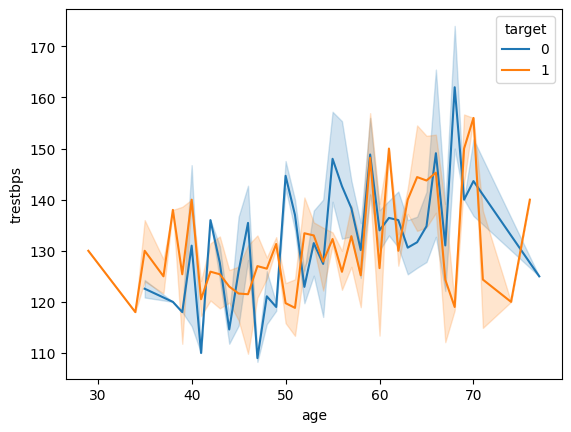

In [17]:
sns.lineplot(x='age', y='trestbps', hue='target', data=df)

# GridSearchCV

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [19]:
dataX = df.drop('target', axis=1)
dataY = df['target']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, random_state=0)

In [21]:
import numpy as np
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameter = dict(C=C, penalty=penalty)


In [22]:
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression(max_iter = 3000)
grid = GridSearchCV(logistic, hyperparameter)
grid.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(estimator=LogisticRegression(max_iter=3000),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [23]:
predict = grid.predict(x_test)

In [24]:
accuracy_score(y_test, predict)

0.8634146341463415

In [25]:
grid.best_params_

{'C': 1.0, 'penalty': 'l2'}

# KNN (k-nearest neighbors)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)

classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
predict = classifier.predict(x_test)
accuracy_score(y_test, predict)

0.9121951219512195

In [28]:
params = {'n_neighbors':list(range(1,20)),
         'p':[1,2,3,4,5,6,7,8,9,10],
         'leaf_size':list(range(1,20)),
         'weights':['uniform', 'distance']}
KNNModel = GridSearchCV(classifier, params,cv=3, n_jobs=1)

In [29]:
# GridSearchCV
KNNModel.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'p': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']})

In [30]:
predict = KNNModel.predict(x_test)
accuracy_score(y_test, predict)

1.0

# SVM (Support Vector Machine)

In [31]:
from sklearn.svm import SVC

SVC_classifier = SVC(kernel='linear', gamma=10, C=1.0)
SVC_classifier.fit(x_train, y_train)

SVC(gamma=10, kernel='linear')

In [32]:
predict = SVC_classifier.predict(x_test)
accuracy_score(y_test, predict)

0.8390243902439024